<img src="http://www.organicdatacuration.org/linkedearth/images/5/51/EarthLinked_Banner_blue_NoShadow.jpg">


# Welcome to Pyleoclim!

Pyleoclim is a python package for the analysis of paleoclimate data. It uses the <a href="http://www.clim-past.net/12/1093/2016/cp-12-1093-2016-discussion.html">LiPD</a> format.

Information about how LiPD, including a Notebook highlighting the main functionalities can be found <a href="https://github.com/nickmckay/LiPD-utilities">here</a>.

If you're new to Python and Jupyter Notebook, a quick tutorial is available <a href="https://github.com/nickmckay/LiPD-utilities/tree/master/Examples">here</a>

## Table of contents
* [Mapping](#maps)
* [Plotting](#plots)
    * [Summary plots](#sumplots)
* [Basic functionalities](#basic)

To start, import the pyleoclim module. Example LiPD files can be downloaded <a href ="https://github.com/LinkedEarth/Pyleoclim_util/tree/master/Example">here</a>.

In [1]:
import pyleoclim as pyleo

The pyleoclim package works in tandem with the <a href='https://github.com/nickmckay/LiPD-utilities/tree/master/Python'>LiPD utilities</a>. The following function allows to either give the path of the directory containing the LiPD files or directly pass a list of timeseries obtained from lipd.extractTs(). Wihtout argument, this function will trigger a GUI to allow you to navigate to the directory. 

If you forget this step, you'll be prompted when using any of the pyleoclim methods.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> If the list of timeseries is specified, the path ***needs*** to be specified as well</p>
</div>  

In [2]:
pyleo.openLipds(path = "/Users/deborahkhider/Documents/LiPD")

Found: 12 LiPD file(s)
processing: Crystal.McCabe-Glynn.2013.lpd
processing: MD01-2412.Harada.2006.lpd
processing: MD98-2170.Stott.2004.lpd
processing: MD982176.Stott.2004.lpd
processing: O2kLR-EmeraldBasin.Sachs.2007.lpd
processing: Ocean2kHR-AtlanticBahamasTOTORosenheim2005.lpd
processing: Ocean2kHR-AtlanticCapeVerdeMoses2006.lpd
processing: Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003.lpd
processing: Ocean2kHR-AtlanticPrincipeSwart1998.lpd
processing: Ocean2kHR-PacificClippertonClipp2bWu2014.lpd
processing: Ocean2kHR-PacificNauruGuilderson1999.lpd
processing: ODP1098B.lpd
extracting: MD982176.Stott.2004.lpd
extracting: Ocean2kHR-AtlanticPrincipeSwart1998.lpd
extracting: O2kLR-EmeraldBasin.Sachs.2007.lpd
extracting: Ocean2kHR-AtlanticCapeVerdeMoses2006.lpd
extracting: Ocean2kHR-PacificNauruGuilderson1999.lpd
extracting: Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003.lpd
extracting: MD01-2412.Harada.2006.lpd
extracting: Ocean2kHR-AtlanticBahamasTOTORosenheim2005.lpd
extracting: MD98-217

All the Pyleoclim modules are loaded and ready to go. The sections below describe the available functions.

## <a id="mapping"> Mapping </a>

### mapAll()

This function maps all the LiPD records in the working directory according to archiveType. It uses a default palette color accessible by typing `pyleo.plot_default`

Synthax: `fig = pyleoclim.mapAll(markersize = 50, saveFig = False, dir = "", format = "eps")`

Optional arguments:
* `markersize`: default is 50
* `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

Returns: The figure

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> This function takes optional arguments. If they are specified byt the user, then Python will use the specified values, otherwise the function will run with the default value. Unlike required arguments, optional arguments always include an equal sign with the specified values.</p>
<p> To run the function with the default arguments, simply use `FunctionName()`</p>
<p> If you wish to only change one argument from its default value, just enter the argument name followed by its new value.</p>
</div>   

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> To visualize matplotlib plot inside the Notebook, we need to use the `%matplotib notebook` or `%matplotib inline` Magic command. Jupyter has an extensive list of special functions called Magic commands. These commands are built-in and can be run from anywhere. They are generally identified by their preceding % sign. </p> 
</div> 

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


Found: 12 file(s)
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete


//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


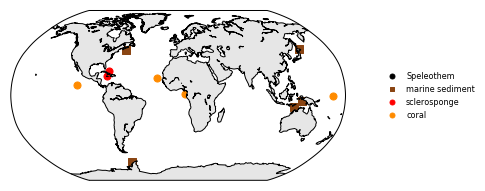

In [3]:
%matplotlib inline
fig = pyleo.mapAll()

Let's change the marksize to 100.

Found: 12 file(s)
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()



Process Complete
Process Complete
Process Complete


//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


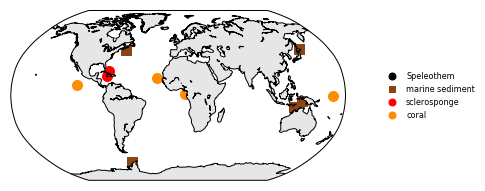

In [4]:
%matplotlib inline
fig = pyleo.mapAll(markersize = 100)

### mapLipd()

This function maps one particular LiPD record stored in the working directory.

Synthax: `fig = pyleoclim.mapLipd(name="", countries = True, counties = False, \
        rivers = False, states = False, background = "shadedrelief",\
        scale = 0.5, markersize = 50, marker = "default", \
        saveFig = False, dir = "", format="eps")`
        
Optional arguments:
* `name`: the name of the LiPD file. **WITH THE .LPD EXTENSION!**. If not provided, will prompt the user for one.
* `countries`: Draws the country borders. Default is on (True).
* `counties`: Draws the USA counties. Default is off (False).
* `states`: Draws the American and Australian states borders. Default is off (False)
* `background`: Plots one of the following images on the map: bluemarble, etopo, shadedrelief,
       or none (filled continents). Default is shadedrelief
* `scale`: useful to downgrade the original image resolution to speed up the process. Default is 0.5.
* `markersize`: default is 100
* `marker`: a string (or list) containing the color and shape of the marker. Default is by archiveType.
         Type pyleo.plot_default to see the default palette. 
* `saveFig`: default is to save the figure
* `dir`: the full path of the directory in which to save the figure. If not provided, creates
          a default folder called 'figures' in the LiPD working directory (lipd.path).  
* `format`: One of the file extensions supported by the active backend. Default is "eps".
          Most backend support png, pdf, ps, eps, and svg.

Found: 12 file(s)
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Process Complete
Found: 12 file(s)
Below are the available records
0 :  Crystal.McCabe-Glynn.2013.lpd
1 :  MD01-2412.Harada.2006.lpd
2 :  MD98-2170.Stott.2004.lpd
3 :  MD982176.Stott.2004.lpd
4 :  O2kLR-EmeraldBasin.Sachs.2007.lpd
5 :  ODP1098B.lpd
6 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005.lpd
7 :  Ocean2kHR-AtlanticCapeVerdeMoses2006.lpd
8 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003.lpd
9 :  Ocean2kHR-AtlanticPrincipeSwart1998.lpd
10 :  Ocean2kHR-PacificClippertonClipp2bWu2014.lpd
11 :  Ocean2kHR-PacificNauruGuilderson1999.lpd
Enter the number of the file you wish to analyze: 3


//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (

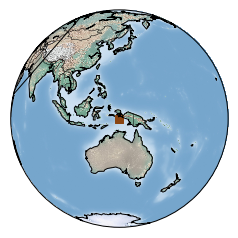

In [5]:
%matplotlib inline
fig = pyleo.mapLipd()

## <a id="plots">Plotting</a>

### plotTs()

Plot a time series. 

Synthax:
`fig = pyleoclim.PlotTs(timeseries = "", x_axis = "", markersize = 50, marker = "default", saveFig = True, dir = "figures", format="eps")`

Optional arguments:
* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user. 
* `markersize`: Default is 50
* `marker`: Shape and color. Default uses the Pyleoclim color palette. If you wish to change the default marker, enter the color and shape (**in this order**). For instance to use a red square, use `'rs'`. 
*  `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

0 :  MD982176.Stott.2004 :  Mg/Ca-g.rub
1 :  MD982176.Stott.2004 :  sst
2 :  MD982176.Stott.2004 :  d18Ow-s
3 :  MD982176.Stott.2004 :  d18Ob.rub
4 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d18O
5 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d13C
6 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
7 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
8 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
9 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
10 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
11 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
12 :  Ocean2kHR-AtlanticCapeVerdeMoses2006 :  d18O
13 :  Ocean2kHR-PacificNauruGuilderson1999 :  d18O
14 :  Ocean2kHR-PacificNauruGuilderson1999 :  d13C
15 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  Sr_Ca
16 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
17 :  MD01-2412.Harada.2006 :  calyrbp
18 :  MD01-2412.Harada.2006 :  uk37
19 :  MD01-2412.Harada.2006 :  sst
20 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005 :  d18O
21 :  Ocean2kHR-AtlanticBahamasTOTORosenh

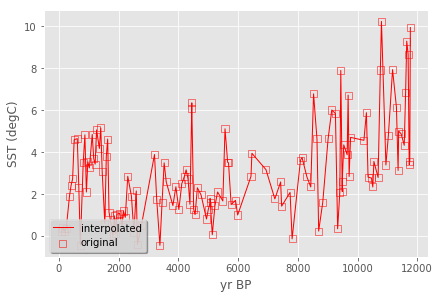

In [6]:
%matplotlib inline
fig = pyleo.plotTs(marker = 'rs')

### Summary Plots
Summary Plots are special plots in Pyleoclim that allow to get basic information about a record.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**NOTE**</p>
<p> These functions use the default color palette and are not customizable.</p> 
</div> 

#### basicSummary()

This functions plots:
1. The time series
2. The location map
3. Age/depth profile if both are available in the paleoDataTable
4. Metadata information

Synthax: `fig = pyleoclim.basicSummary(timeseries = "", x_axis="", saveFig = True, format = "eps", dir = "figures")`

* `timeseries`: A timeseries object as defined in LiPD. If left blank, you'll be prompted to choose the record from a list.
* `x-axis`: The representation against which to plot the paleo-data. Options are "age","year", and "depth". Default is to let the system choose if only one available or prompt the user.  
*  `saveFig`: if `True`, saves the map into the `dir` folder in the current working directory. 
* `dir`: a folder in the current directory, where the various figures can be saved. If left blank, a folder named `figures` will be automatically created
* `format`: One of the file extensions supported by the ative backend. Default is `eps`. Most backends support `png`, `pdf`, `ps`, and `svg`. 

0 :  MD982176.Stott.2004 :  Mg/Ca-g.rub
1 :  MD982176.Stott.2004 :  sst
2 :  MD982176.Stott.2004 :  d18Ow-s
3 :  MD982176.Stott.2004 :  d18Ob.rub
4 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d18O
5 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d13C
6 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
7 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
8 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
9 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
10 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
11 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
12 :  Ocean2kHR-AtlanticCapeVerdeMoses2006 :  d18O
13 :  Ocean2kHR-PacificNauruGuilderson1999 :  d18O
14 :  Ocean2kHR-PacificNauruGuilderson1999 :  d13C
15 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  Sr_Ca
16 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
17 :  MD01-2412.Harada.2006 :  calyrbp
18 :  MD01-2412.Harada.2006 :  uk37
19 :  MD01-2412.Harada.2006 :  sst
20 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005 :  d18O
21 :  Ocean2kHR-AtlanticBahamasTOTORosenh

//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
//anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (

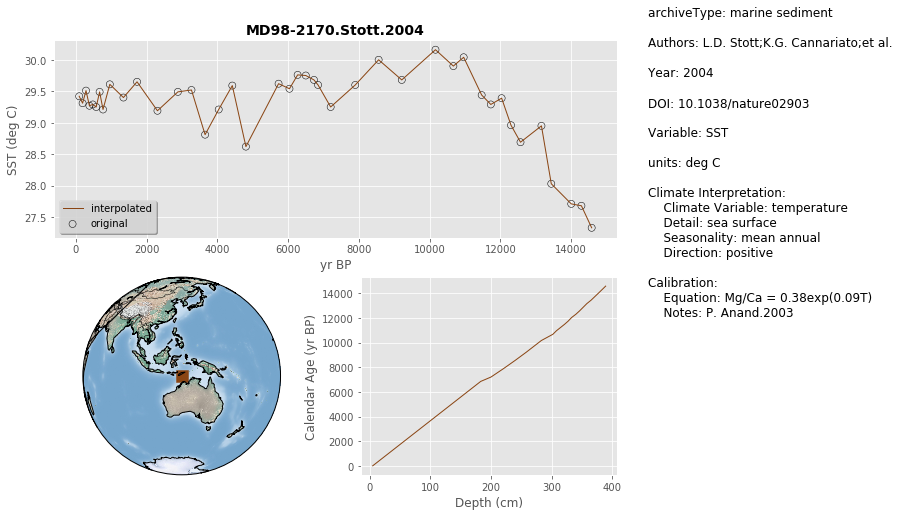

In [7]:
%matplotlib inline
fid = pyleo.basicSummary()

## <a id="basic"> Basic Functionalities </a>

### statsTs()

Returns the mean and standard deviation of the timeseries

synthax: `mean, std = pyleoclim.statsTs(timeseries="")`

Optional arguments:
* `timeseries`: If blank, will prompt for one.

In [8]:
mean, std = pyleo.statsTs()
print(mean)
print(std)

0 :  MD982176.Stott.2004 :  Mg/Ca-g.rub
1 :  MD982176.Stott.2004 :  sst
2 :  MD982176.Stott.2004 :  d18Ow-s
3 :  MD982176.Stott.2004 :  d18Ob.rub
4 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d18O
5 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d13C
6 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
7 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
8 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
9 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
10 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
11 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
12 :  Ocean2kHR-AtlanticCapeVerdeMoses2006 :  d18O
13 :  Ocean2kHR-PacificNauruGuilderson1999 :  d18O
14 :  Ocean2kHR-PacificNauruGuilderson1999 :  d13C
15 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  Sr_Ca
16 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
17 :  MD01-2412.Harada.2006 :  calyrbp
18 :  MD01-2412.Harada.2006 :  uk37
19 :  MD01-2412.Harada.2006 :  sst
20 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005 :  d18O
21 :  Ocean2kHR-AtlanticBahamasTOTORosenh

### binTs()

Bins the values of the timeseries 

synthax: `bins, binned_data, n, error = pyleoclim.binTs(timeseries="", x_axis = "", bin_size = "", start = "", end = "")`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `bin_size`: the size of the bins to be used. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `bins`: the bins centered on the median (i.e., the 100-200 yr bin is 150 yr)
* `binned_data`: the mean of the paleoData values in the particular bin
* `n`: the number of values used to obtain the average
* `error`: the standard error of the mean

0 :  MD982176.Stott.2004 :  Mg/Ca-g.rub
1 :  MD982176.Stott.2004 :  sst
2 :  MD982176.Stott.2004 :  d18Ow-s
3 :  MD982176.Stott.2004 :  d18Ob.rub
4 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d18O
5 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d13C
6 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
7 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
8 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
9 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
10 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
11 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
12 :  Ocean2kHR-AtlanticCapeVerdeMoses2006 :  d18O
13 :  Ocean2kHR-PacificNauruGuilderson1999 :  d18O
14 :  Ocean2kHR-PacificNauruGuilderson1999 :  d13C
15 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  Sr_Ca
16 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
17 :  MD01-2412.Harada.2006 :  calyrbp
18 :  MD01-2412.Harada.2006 :  uk37
19 :  MD01-2412.Harada.2006 :  sst
20 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005 :  d18O
21 :  Ocean2kHR-AtlanticBahamasTOTORosenh

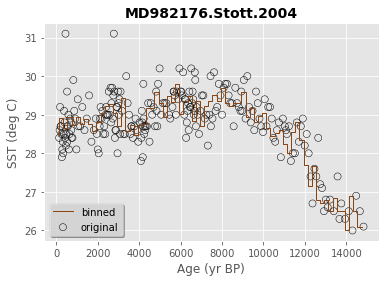

In [9]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""

# get a new timeseries object
new_timeseries = pyleo.getTs(pyleo.timeseries_list) 

# Bin the data
bin_size = 200
bins, binned_data, n, error  = pyleo.binTs(timeseries = new_timeseries, bin_size = bin_size)

# Get the archiveType
archiveType = pyleo.LipdToOntology(new_timeseries["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(new_timeseries["age"], new_timeseries["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.step(bins-bin_size/2,binned_data,
        where = 'pre',
        color = marker[0],
        linewidth = 1.0,
        label = 'binned')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(new_timeseries["dataSetName"], fontsize = 14, fontweight = "bold")

### interpTs()

Bins the values of the timeseries 

synthax: `interp_age, interp_values = pyleoclim.interpTs(timeseries="", x_axis = "", interp_step = "", start = "", end = "")`

Optional arguments:
* `Timeseries`. Default is blank, will prompt for it
* `x-axis`: the time or depth index to use for binning. Valid keys inlude: depth, age, and year. 
* `bin_size`: the step size. If not given, the function will prompt the user
* `start`: where the bins should start. Default is the minimum 
* `end`: where the bins should end. Default is the maximum

Returns:
* `interp_age`: the interpolated age according to the end/start and time step
* `interp_values`: the interpolated values

0 :  MD982176.Stott.2004 :  Mg/Ca-g.rub
1 :  MD982176.Stott.2004 :  sst
2 :  MD982176.Stott.2004 :  d18Ow-s
3 :  MD982176.Stott.2004 :  d18Ob.rub
4 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d18O
5 :  Ocean2kHR-AtlanticPrincipeSwart1998 :  d13C
6 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
7 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
8 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
9 :  O2kLR-EmeraldBasin.Sachs.2007 :  notes
10 :  O2kLR-EmeraldBasin.Sachs.2007 :  temperature
11 :  O2kLR-EmeraldBasin.Sachs.2007 :  Uk37
12 :  Ocean2kHR-AtlanticCapeVerdeMoses2006 :  d18O
13 :  Ocean2kHR-PacificNauruGuilderson1999 :  d18O
14 :  Ocean2kHR-PacificNauruGuilderson1999 :  d13C
15 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  Sr_Ca
16 :  Ocean2kHR-AtlanticMontegoBayHaaseSchramm2003 :  d18O
17 :  MD01-2412.Harada.2006 :  calyrbp
18 :  MD01-2412.Harada.2006 :  uk37
19 :  MD01-2412.Harada.2006 :  sst
20 :  Ocean2kHR-AtlanticBahamasTOTORosenheim2005 :  d18O
21 :  Ocean2kHR-AtlanticBahamasTOTORosenh

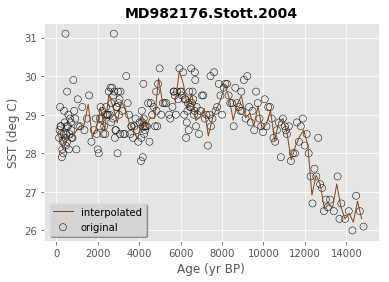

In [10]:
"""
Note the following provides an example on how to use pyleoclim in conjunction with making your own plots.
This example is mean to work with the following timeseries: MD982176.Stott.2004 :  sst
"""

# get a new timeseries object
new_timeseries = pyleo.getTs(pyleo.timeseries_list) 

# interpolate the data
interp_age, interp_values = pyleo.interpTs(timeseries = new_timeseries)

# Get the archiveType
archiveType = pyleo.LipdToOntology(new_timeseries["archiveType"])

# Make a figure of the binned vs original data 
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")
marker = [pyleo.plot_default[archiveType][0], pyleo.plot_default[archiveType][1]] #define color coding
markersize = 50 #define marker size
plt.scatter(new_timeseries["age"], new_timeseries["paleoData_values"],
           s = markersize,
           facecolor = 'none',
           edgecolor = 'k',
           marker = 'o',
           label = 'original')
plt.plot(interp_age,interp_values,
        color = marker[0],
        linewidth = 1.0,
        label = 'interpolated')
plt.xlabel("Age (yr BP)")
plt.ylabel("SST (deg C)")
plt.legend(loc = 3, scatterpoints =1, fancybox = True, shadow = True, fontsize = 10)
plt.title(new_timeseries["dataSetName"], fontsize = 14, fontweight = "bold")